# 3 Period English Analysis

## [1. Moduel Import]

## [2. Data Load]

## [3. Preprocess]

#### 3-1) Data Cleaning

#### 3-2) Tokenize

#### 3-3) Remove Stopwords

#### 3-4) Tagging

## [4. Analysis]

#### 4-1) Frequency
- 분석 1) 전체 Text에서의 Frequency (상위 30개)
- 분석 2) 각 POS('noun', 'verb', ...)별 분포와 비율
- 분석 3) 'noun'인 token들의 Frequncy (상위 30개)
- 분석 4) 'verb'인 token들의 Frequncy (상위 30개)
- 분석 5) 'adjective'인 token들의 Frequncy (상위 30개)
- 각 분석에 대해 StopWord 제거 이전과 이후에 대한 시각화를 모두 진행하였습니다.

#### 4-2) WordCloud

#### 4-3) Topic Modeling (LDA)
- 토픽의 개수(NUM_TOPICS(= k))는 각 시기 당 할당된 기사의 수가 10개 이기 때문에 10으로 설정하였습니다.
- 실험적으로 최적의 k 값을 찾아나갈 예정입니다.

#### ~~4-4) Network web analysis~~
- 연관 관계 계산과정에서 실행시간이 오래 걸려서 먼저 완성할 수 있는 시각화 분석을 먼저 수행하였습니다.

## 1. Module Import

In [1]:
# self defined Modules
from myModules.ST.DataLoader import DataLoader
from myModules.ST.cleaning import cleaning
from myModules.ST.tokenizing import tokenizing
from myModules.ST.stopwords import removeStopWords
from myModules.ST.tagging import tagging
from myModules.ST.mergeOverPeriod import merge
from myModules.ST.plotFrequency import plotOverallFrequency, calcTags, plotPOSFrequency, showCountNRate, tag2csv, plotTagFrequency, CountNLabelOverPOS
from myModules.ST.plotWordCloud import plotWordCloud
from myModules.ST.ldaModeling import buildDTM, topicWords, visualizeLDA

# General Modules
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Read File
import glob

# NLP
import nltk
from nltk.tokenize import TreebankWordTokenizer
from gensim import models
from apyori import apriori
from nltk import FreqDist

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Data Load

In [2]:
DATA_ROOT = './Data/3구간/'

PERIOD_1 = DATA_ROOT + '1시기/1시기_ST/'
PERIOD_2 = DATA_ROOT + '2시기/2시기_ST/'
PERIOD_3 = DATA_ROOT + '3시기/3시기_ST/'

RESULT_ROOT = './Result/3구간/'

RESULT_1 = RESULT_ROOT + '/1시기/ST/'
RESULT_2 = RESULT_ROOT + '/2시기/ST/'
RESULT_3 = RESULT_ROOT + '/3시기/ST/'

In [3]:
files_1 = glob.glob(PERIOD_1+'*.txt')
files_2 = glob.glob(PERIOD_2+'*.txt')
files_3 = glob.glob(PERIOD_3+'*.txt')

texts_1 = DataLoader(files_1)
texts_2 = DataLoader(files_2)
texts_3 = DataLoader(files_3)

## 3. PreProcess

### 3-1. Data Cleaning

In [4]:
cleaned_1 = cleaning(texts_1)
cleaned_2 = cleaning(texts_2)
cleaned_3 = cleaning(texts_3)

### 3-2. Tokenize

In [5]:
tokenizer = TreebankWordTokenizer()

tokenized_1 = tokenizing(cleaned_1, tokenizer)
tokenized_2 = tokenizing(cleaned_2, tokenizer)
tokenized_3 = tokenizing(cleaned_3, tokenizer)

### 3-3. Remove Stopwords

In [6]:
stopwords = nltk.corpus.stopwords.words('english')
new_stopwords = ['would', 'could', 'might', 'need', 'can', 'must']

wo_stopword_1 = removeStopWords(tokenized_1, stopwords, new_stopwords)
wo_stopword_2 = removeStopWords(tokenized_2, stopwords, new_stopwords)
wo_stopword_3 = removeStopWords(tokenized_3, stopwords, new_stopwords)

### 3-4. Tagging

In [7]:
tagList = [['noun', ['NN','NNS','NNP','NNPS'], ['NNG','NNB','NNP','NNM']], \
    ['pronoun', ['PRP','WP','PRP'], ['NP']],
    ['verb', ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'], ['VV', 'VXV', 'VCP']],
    ['adjective', ['JJ', 'JJR', 'JJS'], ['VA', 'VXA', 'VCN']],
    ['adverb', ['RB', 'RBR', 'RBS', 'WRB', 'EX', 'RP'], ['MAG']],
    ['prep&conj', ['TO', 'IN', 'CC'], ['MAC']],
    ['determiner', ['DT', 'PDT', 'WDT'], ['MDT', 'MDN']],
    ['interjection',['UH'], ['IC']],
    ['number', ['CD'], ['NR', 'ON']],
    ['foreignW', ['FW'],['OL']],
    ['modal',['MD'],[]],
    ['josa', [], ['JC', 'JK', 'JKC', 'JKG', 'JKI', 'JKM', 'JKO', 'JKQ', 'JKS', 'JX']],
    ['possesiveS', ['POS'], []],
    ['others',['LS'], ['EPH', 'EPT', 'EPP', 'EFN', 'EFQ', 'EFO', 'EFA', 'EFI', 'EFR', 'ECE', 'ECD', 'ECS', 'ETN', 'ETD', 'XPN', 'XPV', 'XSN', 'XSV', 'XSA', 'XR', 'UN', 'OH']]]

tagList = pd.DataFrame(tagList)
tagList.columns = ['POS', 'Eng_tag', 'Kor_tag']

In [8]:
tagged_1 = tagging(tokenized_1)
tagged_2 = tagging(tokenized_2)
tagged_3 = tagging(tokenized_3)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

## 4. Analysis

### 4-1. Frequency


#### Period 1

##### 분석 1) 전체 Text에서의 Frequency (상위 30개)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


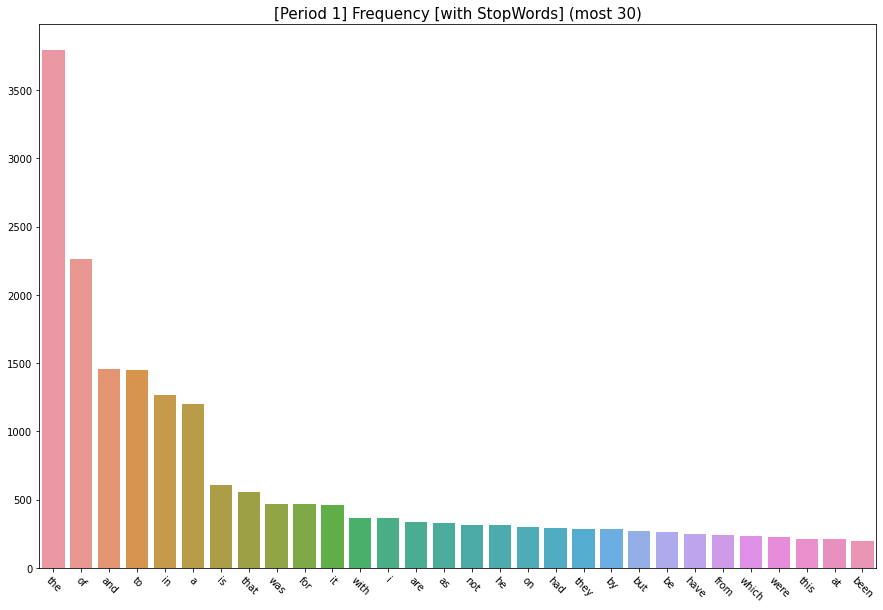

In [9]:
plotOverallFrequency(merge(tokenized_1), filepath=RESULT_1, wo=False, period=1)

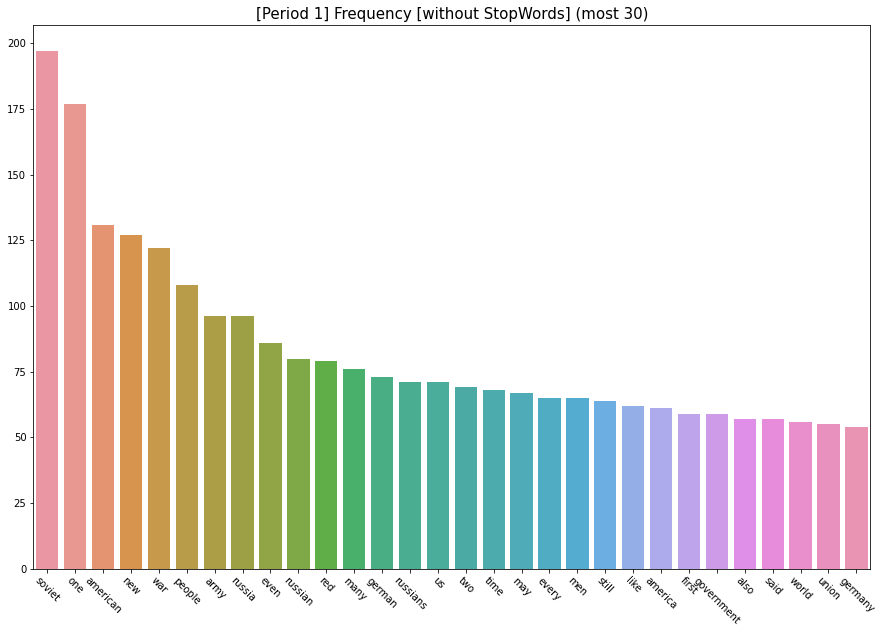

In [10]:
plotOverallFrequency(merge(wo_stopword_1), filepath=RESULT_1, wo=True, period=1)

In [11]:
countDict_1, classDict_1 = calcTags(merge(tagged_1), tagList)
wo_countDict_1, wo_classDict_1 = calcTags(merge(tagging(wo_stopword_1)), tagList)

  0%|          | 0/57124 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/31525 [00:00<?, ?it/s]

##### 분석 2) 각 POS('noun', 'verb', ...)별 분포와 비율

In [12]:
showCountNRate(countDict_1, "with Stopwords")

[with Stopwords]
-------------------------
전체 토큰 수 | 57124개
[noun] 토큰 수 : 15441개 | 비율 : 27.03%
[pronoun] 토큰 수 : 2147개 | 비율 : 3.76%
[verb] 토큰 수 : 9931개 | 비율 : 17.38%
[adjective] 토큰 수 : 6573개 | 비율 : 11.51%
[adverb] 토큰 수 : 3584개 | 비율 : 6.27%
[prepnconj] 토큰 수 : 11011개 | 비율 : 19.28%
[determiner] 토큰 수 : 6606개 | 비율 : 11.56%
[interjection] 토큰 수 : 0개 | 비율 : 0.0%
[number] 토큰 수 : 382개 | 비율 : 0.67%
[foreignW] 토큰 수 : 18개 | 비율 : 0.03%
[modal] 토큰 수 : 606개 | 비율 : 1.06%
[josa] 토큰 수 : 0개 | 비율 : 0.0%
[possesiveS] 토큰 수 : 0개 | 비율 : 0.0%
[others] 토큰 수 : 0개 | 비율 : 0.0%
-------------------------


In [13]:
showCountNRate(wo_countDict_1, "without Stopwords")

[without Stopwords]
-------------------------
전체 토큰 수 | 31525개
[noun] 토큰 수 : 13967개 | 비율 : 44.3%
[pronoun] 토큰 수 : 106개 | 비율 : 0.34%
[verb] 토큰 수 : 6460개 | 비율 : 20.49%
[adjective] 토큰 수 : 7303개 | 비율 : 23.17%
[adverb] 토큰 수 : 2360개 | 비율 : 7.49%
[prepnconj] 토큰 수 : 679개 | 비율 : 2.15%
[determiner] 토큰 수 : 132개 | 비율 : 0.42%
[interjection] 토큰 수 : 1개 | 비율 : 0.0%
[number] 토큰 수 : 397개 | 비율 : 1.26%
[foreignW] 토큰 수 : 25개 | 비율 : 0.08%
[modal] 토큰 수 : 82개 | 비율 : 0.26%
[josa] 토큰 수 : 0개 | 비율 : 0.0%
[possesiveS] 토큰 수 : 0개 | 비율 : 0.0%
[others] 토큰 수 : 0개 | 비율 : 0.0%
-------------------------


In [14]:
tag2csv(countDict_1, classDict_1, tagList, RESULT_1 + "Frequency over POS-withstopword")
tag2csv(wo_countDict_1, wo_classDict_1, tagList, RESULT_1 + "Frequency over POS-withoutstopword")

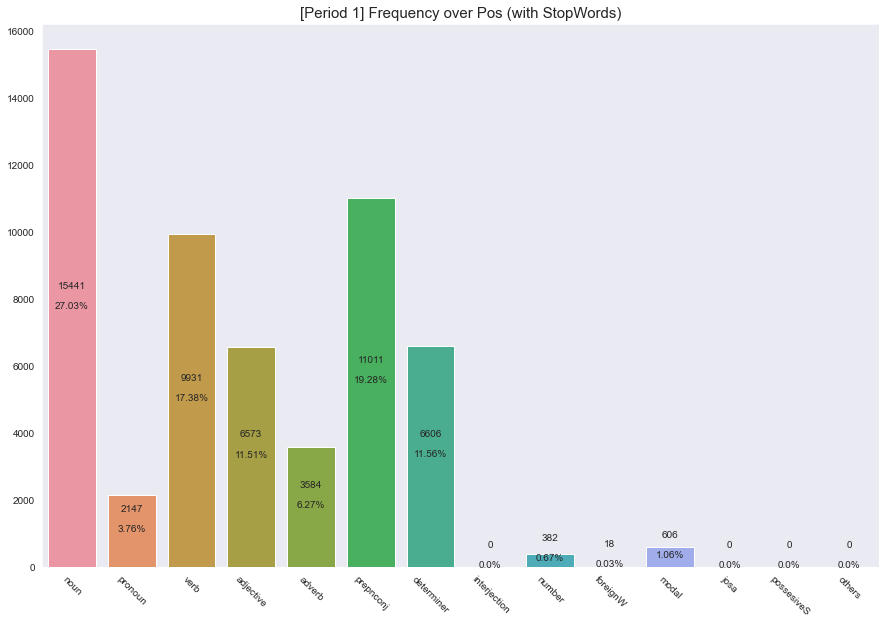

In [15]:
count, labels = CountNLabelOverPOS(countDict_1)

plotTagFrequency(count, labels, "[Period 1] Frequency over Pos (with StopWords)", RESULT_1, wo=False)

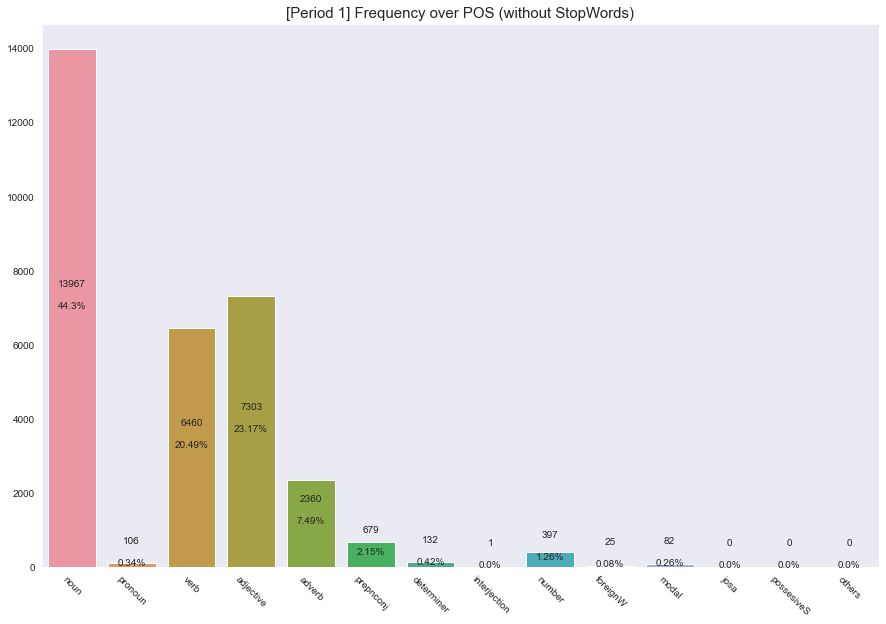

In [16]:
count, labels = CountNLabelOverPOS(wo_countDict_1)

plotTagFrequency(count, labels, "[Period 1] Frequency over POS (without StopWords)", RESULT_1, wo=True)

##### 분석 3) 'noun'인 token들의 Frequncy (상위 30개)

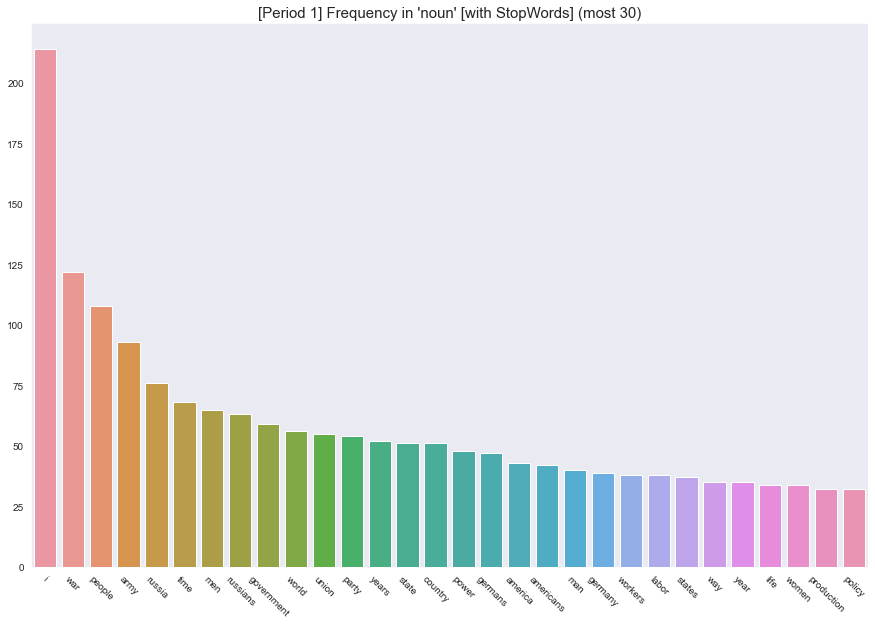

In [17]:
plotPOSFrequency(classDict_1, filepath=RESULT_1, pos='noun', wo=False, period=1)

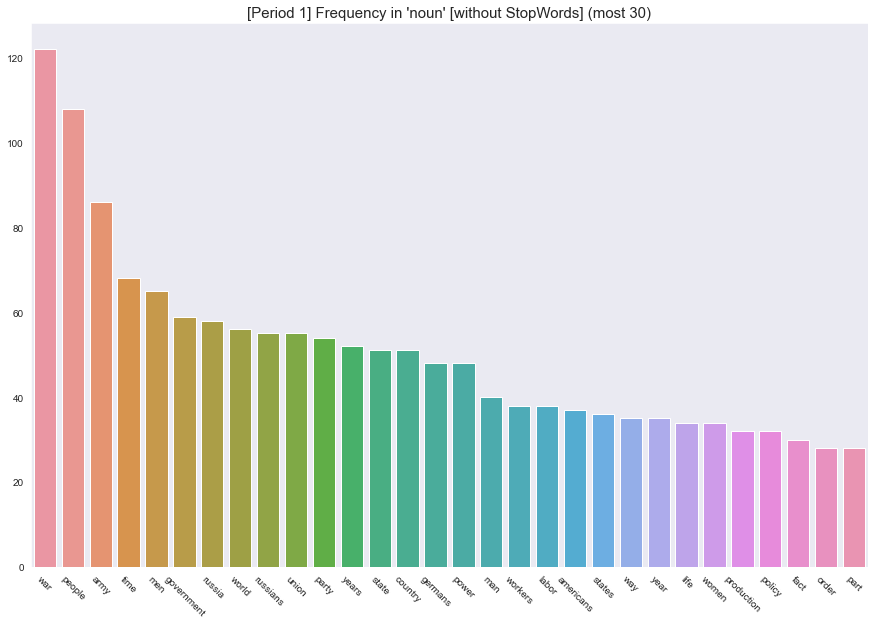

In [18]:
plotPOSFrequency(wo_classDict_1, filepath=RESULT_1, pos='noun', wo=True, period=1)

##### 분석 4) 'verb'인 token들의 Frequncy (상위 30개)

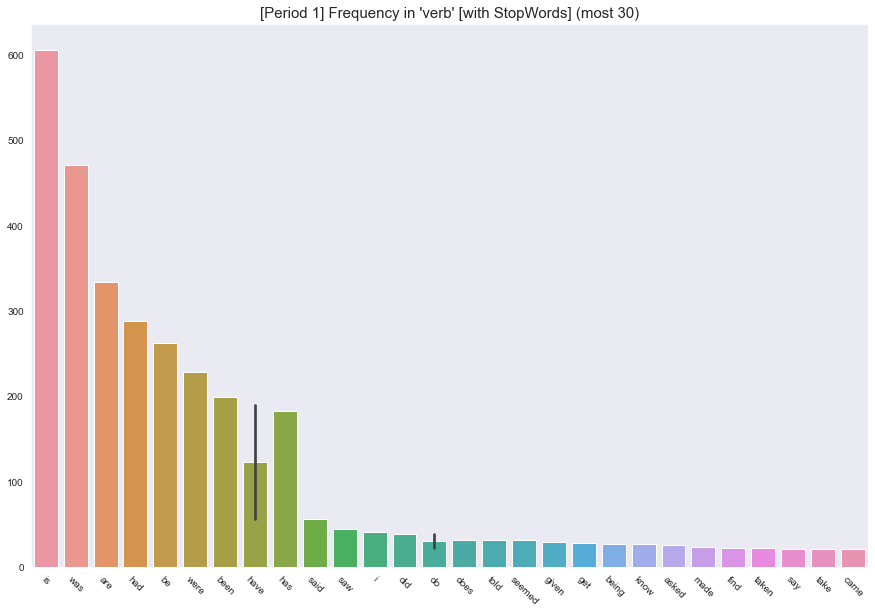

In [19]:
plotPOSFrequency(classDict_1, filepath=RESULT_1, pos='verb', wo=False, period=1)

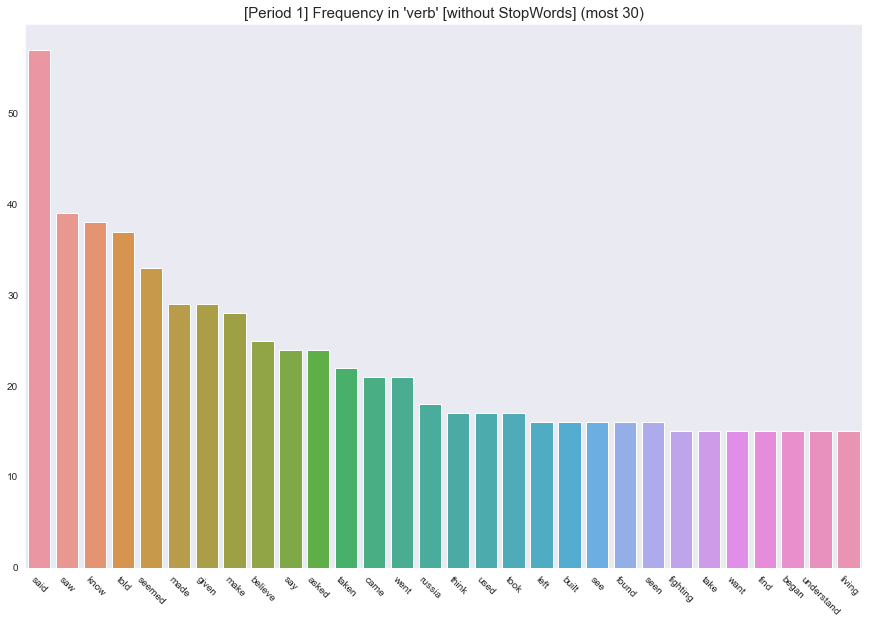

In [20]:
plotPOSFrequency(wo_classDict_1, filepath=RESULT_1, pos='verb', wo=True, period=1)

##### 분석 5) 'adjective'인 token들의 Frequncy (상위 30개)

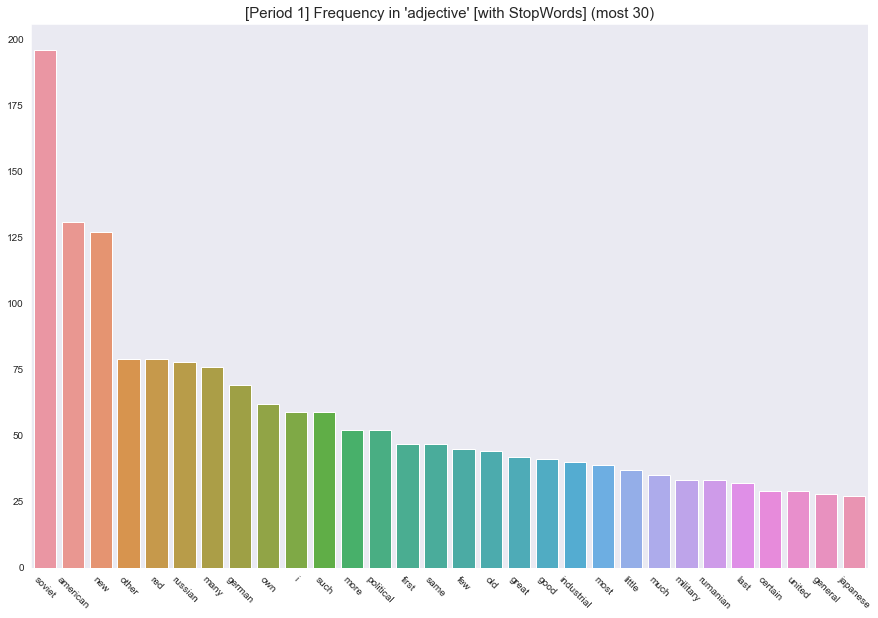

In [21]:
plotPOSFrequency(classDict_1, filepath=RESULT_1, pos='adjective', wo=False, period=1)

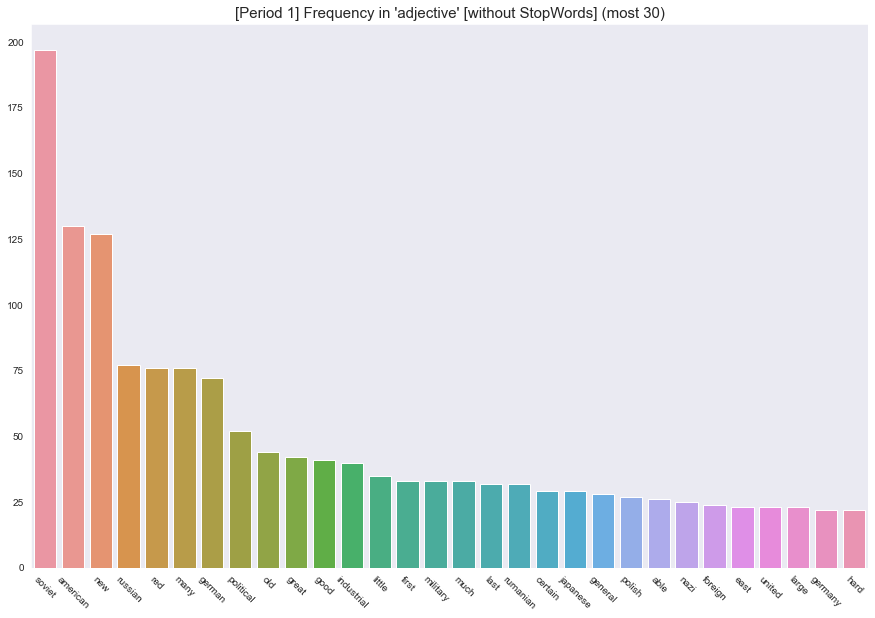

In [22]:
plotPOSFrequency(wo_classDict_1, filepath=RESULT_1, pos='adjective', wo=True, period=1)

#### Period 2

##### 분석 1) 전체 Text에서의 Frequency (상위 30개)

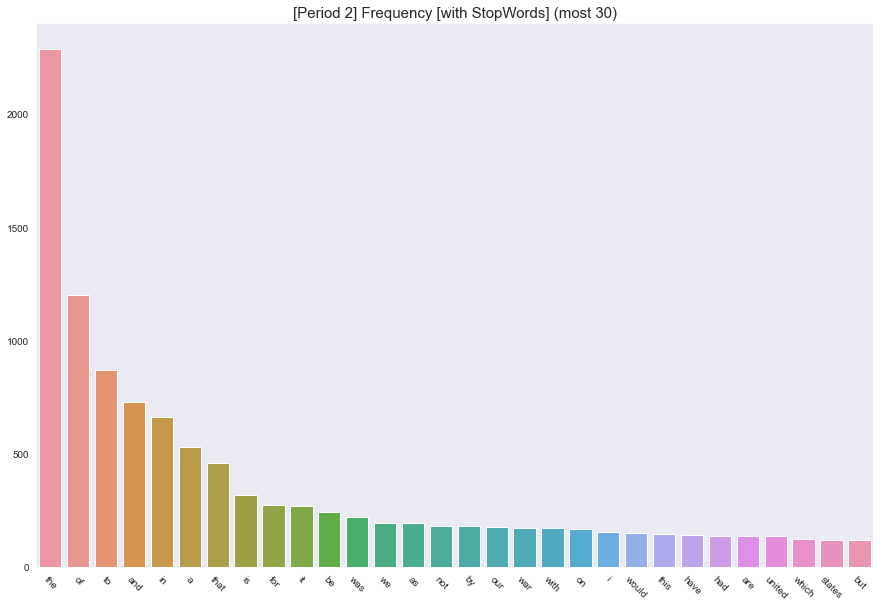

In [23]:
plotOverallFrequency(merge(tokenized_2), filepath=RESULT_2, wo=False, period=2)

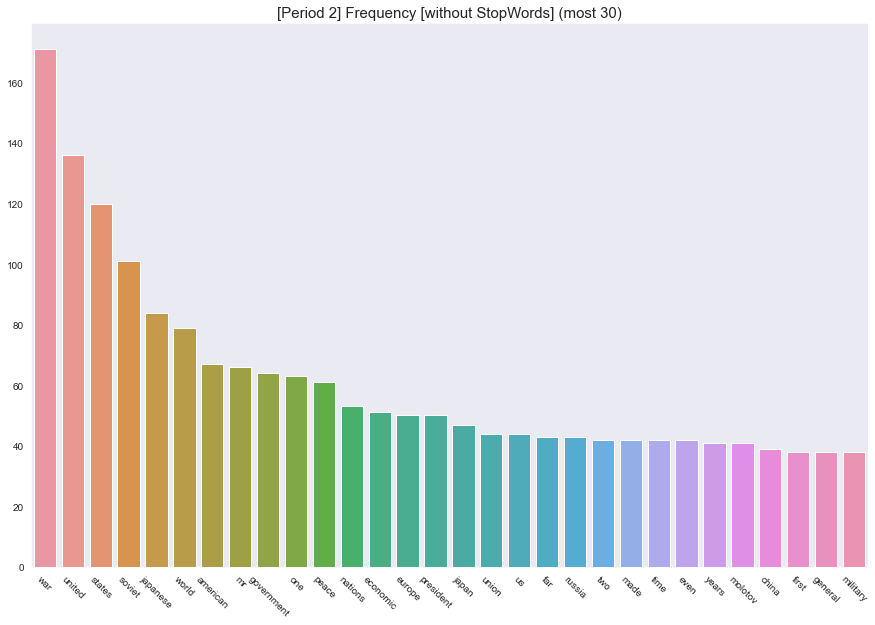

In [24]:
plotOverallFrequency(merge(wo_stopword_2), filepath=RESULT_2, wo=True, period=2)

In [25]:
countDict_2, classDict_2 = calcTags(merge(tagged_2), tagList)
wo_countDict_2, wo_classDict_2 = calcTags(merge(tagging(wo_stopword_2)), tagList)

  0%|          | 0/31307 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/17522 [00:00<?, ?it/s]

##### 분석 2) 각 POS('noun', 'verb', ...)별 분포와 비율

In [26]:
showCountNRate(countDict_2, "with Stopwords")

[with Stopwords]
-------------------------
전체 토큰 수 | 31307개
[noun] 토큰 수 : 8707개 | 비율 : 27.81%
[pronoun] 토큰 수 : 943개 | 비율 : 3.01%
[verb] 토큰 수 : 5388개 | 비율 : 17.21%
[adjective] 토큰 수 : 3678개 | 비율 : 11.75%
[adverb] 토큰 수 : 1646개 | 비율 : 5.26%
[prepnconj] 토큰 수 : 6073개 | 비율 : 19.4%
[determiner] 토큰 수 : 3686개 | 비율 : 11.77%
[interjection] 토큰 수 : 0개 | 비율 : 0.0%
[number] 토큰 수 : 189개 | 비율 : 0.6%
[foreignW] 토큰 수 : 8개 | 비율 : 0.03%
[modal] 토큰 수 : 525개 | 비율 : 1.68%
[josa] 토큰 수 : 0개 | 비율 : 0.0%
[possesiveS] 토큰 수 : 0개 | 비율 : 0.0%
[others] 토큰 수 : 0개 | 비율 : 0.0%
-------------------------


In [27]:
showCountNRate(wo_countDict_2, "with Stopwords")

[with Stopwords]
-------------------------
전체 토큰 수 | 17522개
[noun] 토큰 수 : 8044개 | 비율 : 45.91%
[pronoun] 토큰 수 : 64개 | 비율 : 0.37%
[verb] 토큰 수 : 3478개 | 비율 : 19.85%
[adjective] 토큰 수 : 4114개 | 비율 : 23.48%
[adverb] 토큰 수 : 1104개 | 비율 : 6.3%
[prepnconj] 토큰 수 : 380개 | 비율 : 2.17%
[determiner] 토큰 수 : 67개 | 비율 : 0.38%
[interjection] 토큰 수 : 0개 | 비율 : 0.0%
[number] 토큰 수 : 195개 | 비율 : 1.11%
[foreignW] 토큰 수 : 19개 | 비율 : 0.11%
[modal] 토큰 수 : 54개 | 비율 : 0.31%
[josa] 토큰 수 : 0개 | 비율 : 0.0%
[possesiveS] 토큰 수 : 0개 | 비율 : 0.0%
[others] 토큰 수 : 0개 | 비율 : 0.0%
-------------------------


In [28]:
tag2csv(countDict_2, classDict_2, tagList, RESULT_2 + "Frequency over POS-withstopword")
tag2csv(wo_countDict_2, wo_classDict_2, tagList, RESULT_2 + "Frequency over POS-withoutstopword")

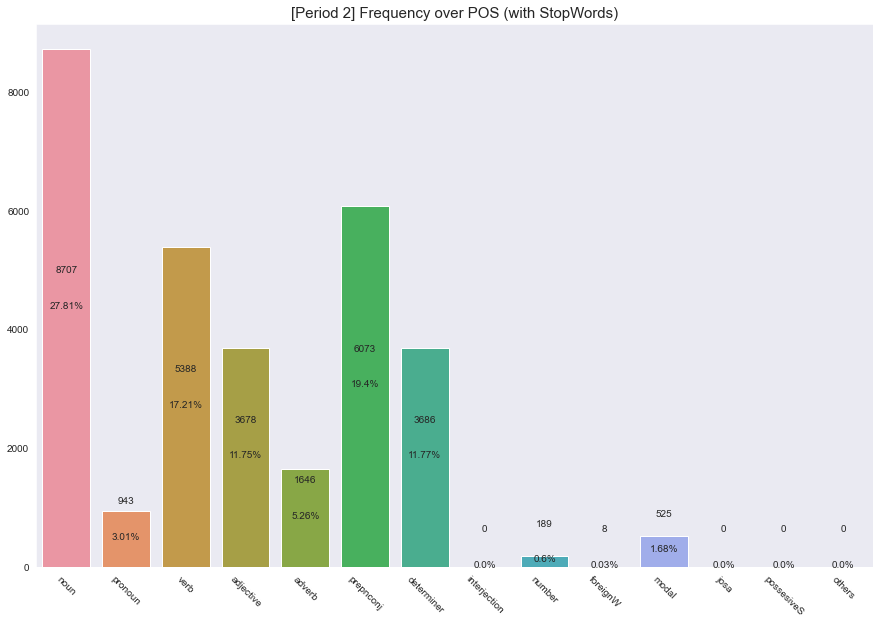

In [29]:
count, labels = CountNLabelOverPOS(countDict_2)

plotTagFrequency(count, labels, "[Period 2] Frequency over POS (with StopWords)", RESULT_2, wo=False)

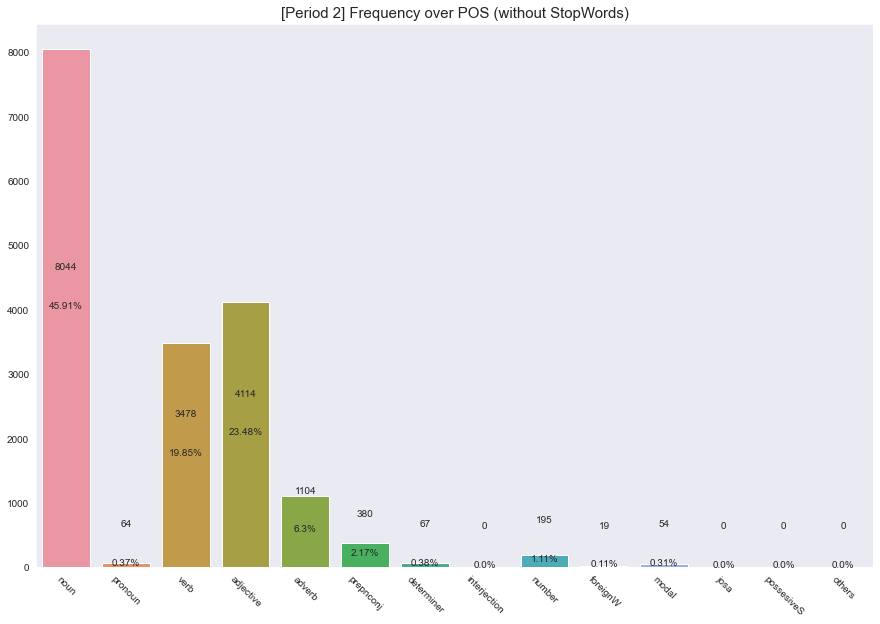

In [30]:
count, labels = CountNLabelOverPOS(wo_countDict_2)

plotTagFrequency(count, labels, "[Period 2] Frequency over POS (without StopWords)", RESULT_2, wo=True)

##### 분석 3) 'noun'인 token들의 Frequncy (상위 30개)

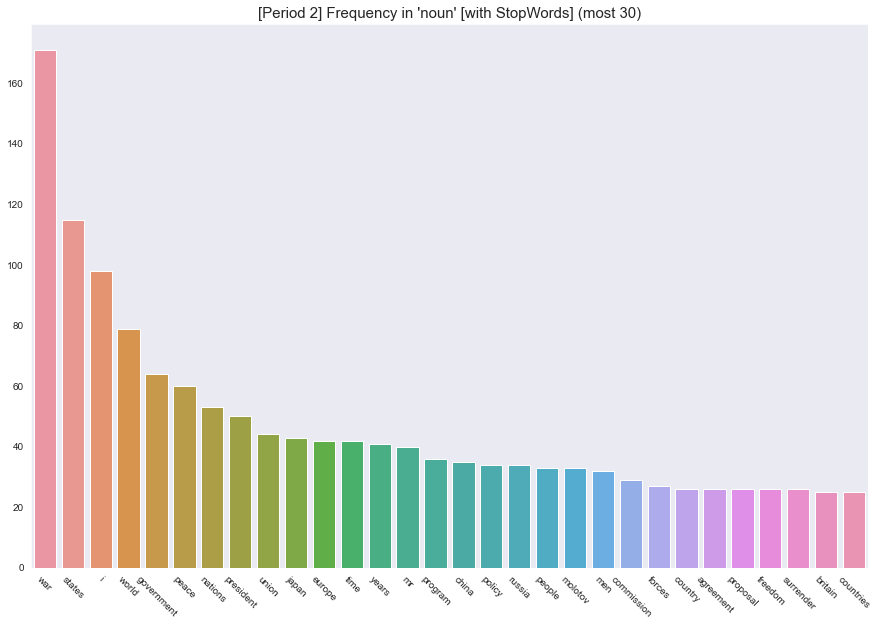

In [31]:
plotPOSFrequency(classDict_2, filepath=RESULT_2, pos='noun', wo=False, period=2)

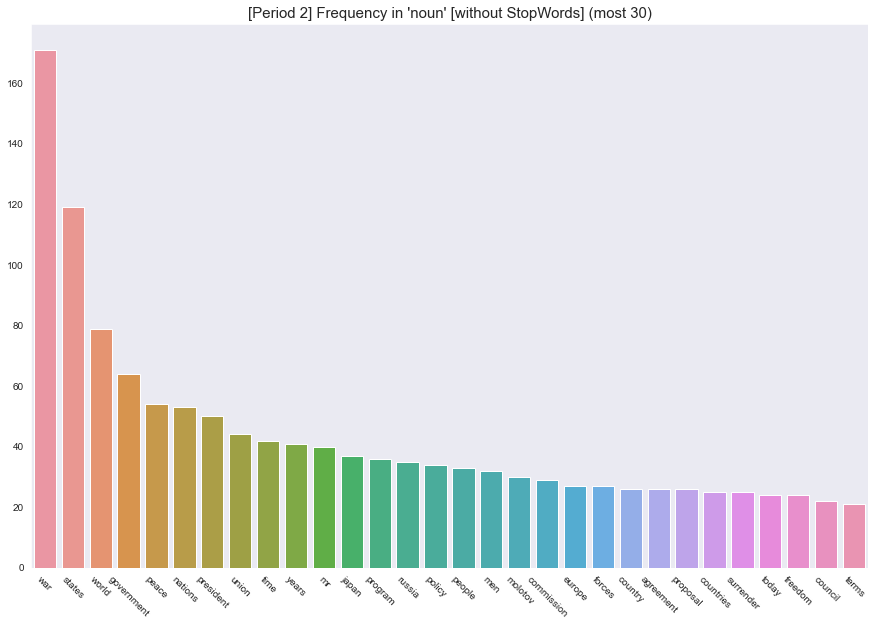

In [32]:
plotPOSFrequency(wo_classDict_2, filepath=RESULT_2, pos='noun', wo=True, period=2)

##### 분석 4) 'verb'인 token들의 Frequncy (상위 30개)

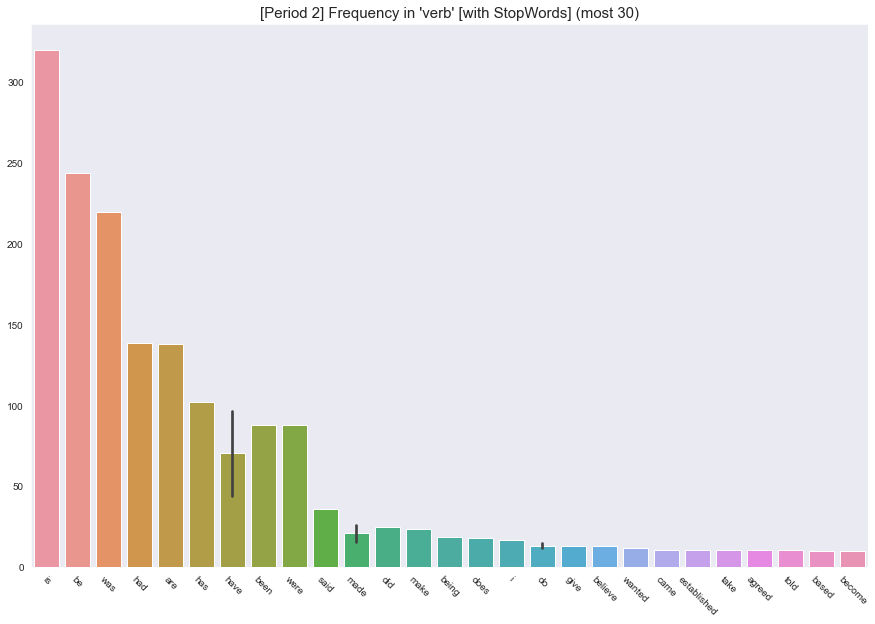

In [33]:
plotPOSFrequency(classDict_2, filepath=RESULT_2, pos='verb', wo=False, period=2)

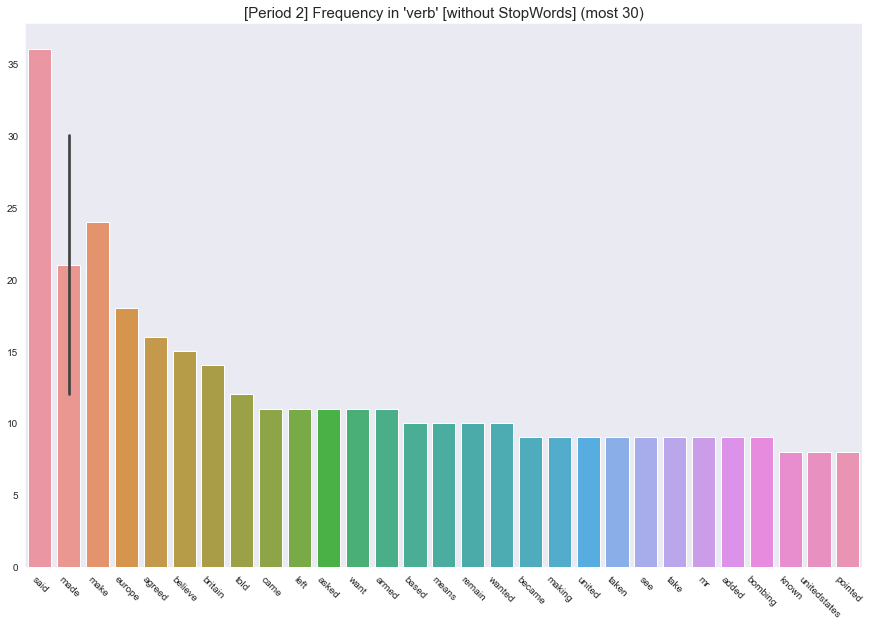

In [34]:
plotPOSFrequency(wo_classDict_2, filepath=RESULT_2, pos='verb', wo=True, period=2)

##### 분석 5) 'adjective'인 token들의 Frequncy (상위 30개)

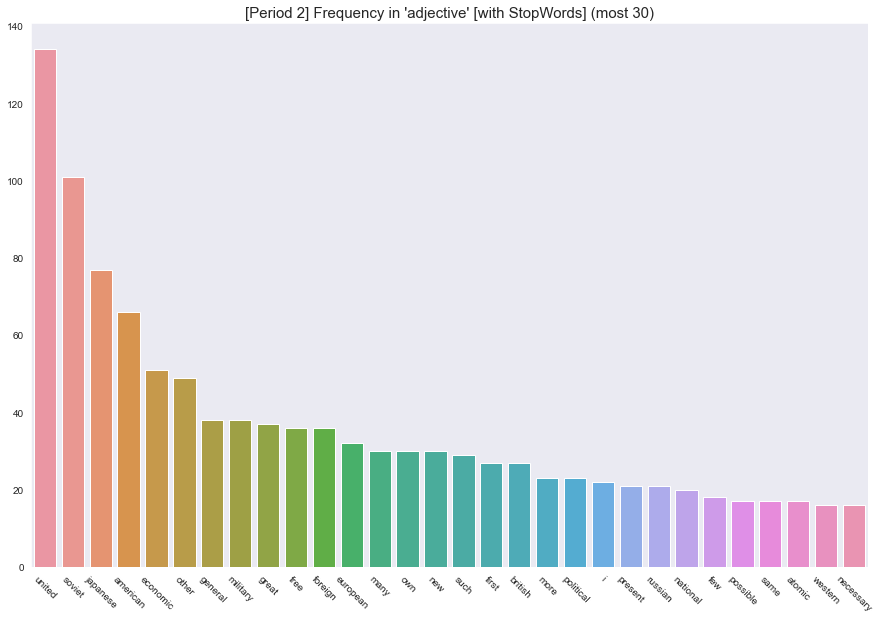

In [35]:
plotPOSFrequency(classDict_2, filepath=RESULT_2, pos='adjective', wo=False, period=2)

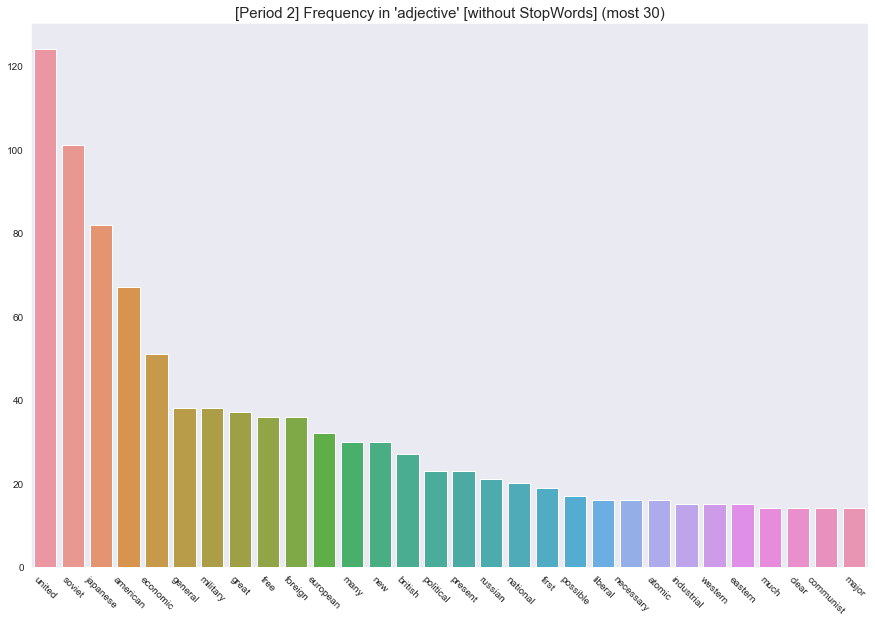

In [36]:
plotPOSFrequency(wo_classDict_2, filepath=RESULT_2, pos='adjective', wo=True, period=2)

#### Period 3

##### 분석 1) 전체 Text에서의 Frequency (상위 30개)

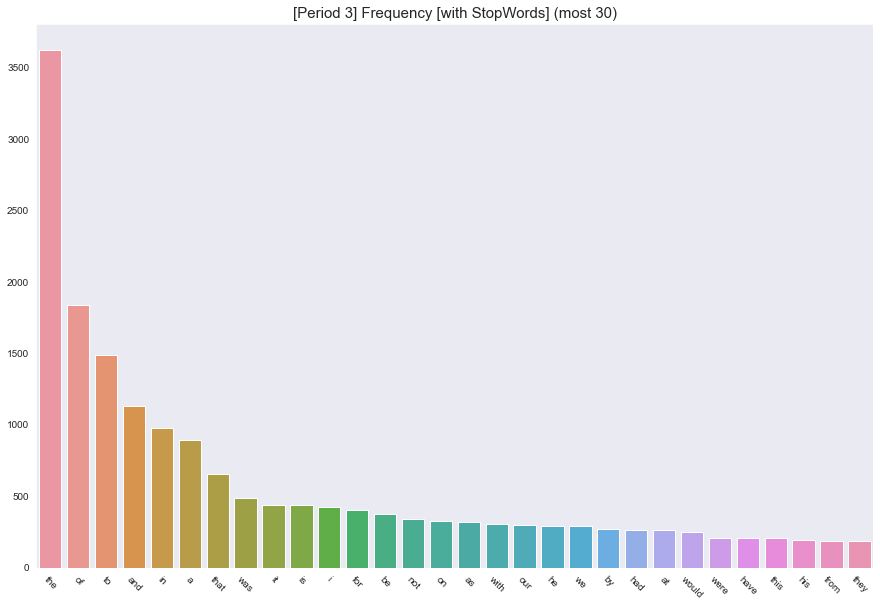

In [37]:
plotOverallFrequency(merge(tokenized_3), filepath=RESULT_3, wo=False, period=3)

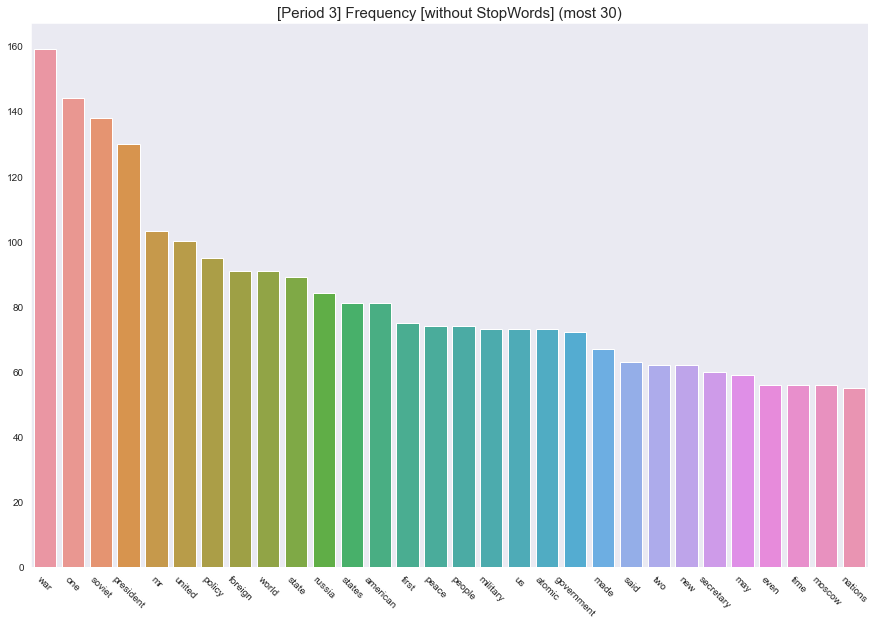

In [38]:
plotOverallFrequency(merge(wo_stopword_3), filepath=RESULT_3, wo=True, period=3)

In [39]:
countDict_3, classDict_3 = calcTags(merge(tagged_3), tagList)
wo_countDict_3, wo_classDict_3 = calcTags(merge(tagging(wo_stopword_3)), tagList)

  0%|          | 0/52151 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/29040 [00:00<?, ?it/s]

##### 분석 2) 각 POS('noun', 'verb', ...)별 분포와 비율

In [40]:
showCountNRate(countDict_3, "with Stopwords")

[with Stopwords]
-------------------------
전체 토큰 수 | 52151개
[noun] 토큰 수 : 14548개 | 비율 : 27.9%
[pronoun] 토큰 수 : 1870개 | 비율 : 3.59%
[verb] 토큰 수 : 9237개 | 비율 : 17.71%
[adjective] 토큰 수 : 5728개 | 비율 : 10.98%
[adverb] 토큰 수 : 3018개 | 비율 : 5.79%
[prepnconj] 토큰 수 : 9699개 | 비율 : 18.6%
[determiner] 토큰 수 : 5961개 | 비율 : 11.43%
[interjection] 토큰 수 : 2개 | 비율 : 0.0%
[number] 토큰 수 : 316개 | 비율 : 0.61%
[foreignW] 토큰 수 : 28개 | 비율 : 0.05%
[modal] 토큰 수 : 878개 | 비율 : 1.68%
[josa] 토큰 수 : 0개 | 비율 : 0.0%
[possesiveS] 토큰 수 : 1개 | 비율 : 0.0%
[others] 토큰 수 : 0개 | 비율 : 0.0%
-------------------------


In [41]:
showCountNRate(wo_countDict_3, "without Stopwords")

[without Stopwords]
-------------------------
전체 토큰 수 | 29040개
[noun] 토큰 수 : 13381개 | 비율 : 46.08%
[pronoun] 토큰 수 : 124개 | 비율 : 0.43%
[verb] 토큰 수 : 5941개 | 비율 : 20.46%
[adjective] 토큰 수 : 6497개 | 비율 : 22.37%
[adverb] 토큰 수 : 1882개 | 비율 : 6.48%
[prepnconj] 토큰 수 : 642개 | 비율 : 2.21%
[determiner] 토큰 수 : 87개 | 비율 : 0.3%
[interjection] 토큰 수 : 2개 | 비율 : 0.01%
[number] 토큰 수 : 336개 | 비율 : 1.16%
[foreignW] 토큰 수 : 43개 | 비율 : 0.15%
[modal] 토큰 수 : 97개 | 비율 : 0.33%
[josa] 토큰 수 : 0개 | 비율 : 0.0%
[possesiveS] 토큰 수 : 0개 | 비율 : 0.0%
[others] 토큰 수 : 0개 | 비율 : 0.0%
-------------------------


In [42]:
tag2csv(countDict_1, classDict_3, tagList, RESULT_3 + "Frequency over POS-withstopword")
tag2csv(wo_countDict_1, wo_classDict_3, tagList, RESULT_3 + "Frequency over POS-withoutstopword")

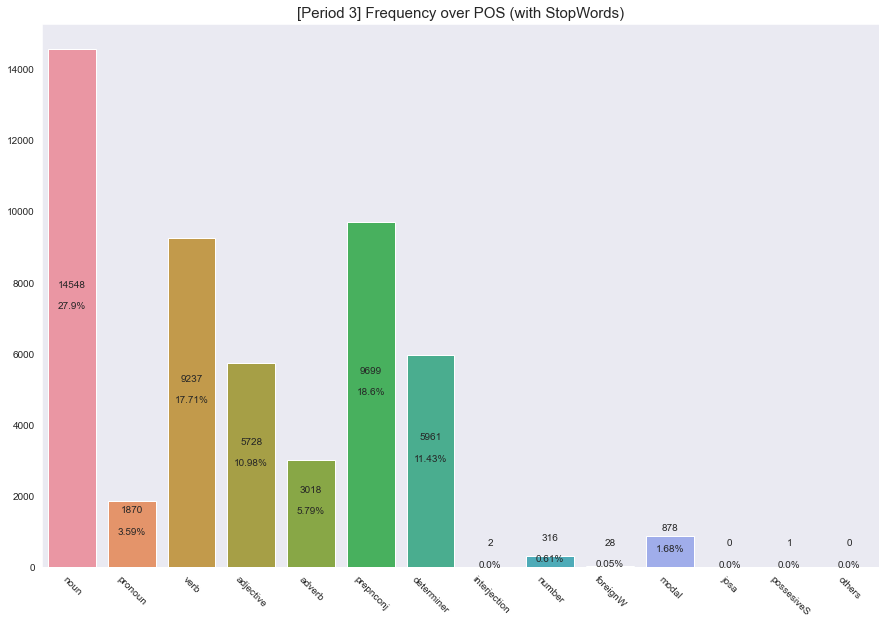

In [43]:
count, labels = CountNLabelOverPOS(countDict_3)

plotTagFrequency(count, labels, "[Period 3] Frequency over POS (with StopWords)", RESULT_3, wo=False)

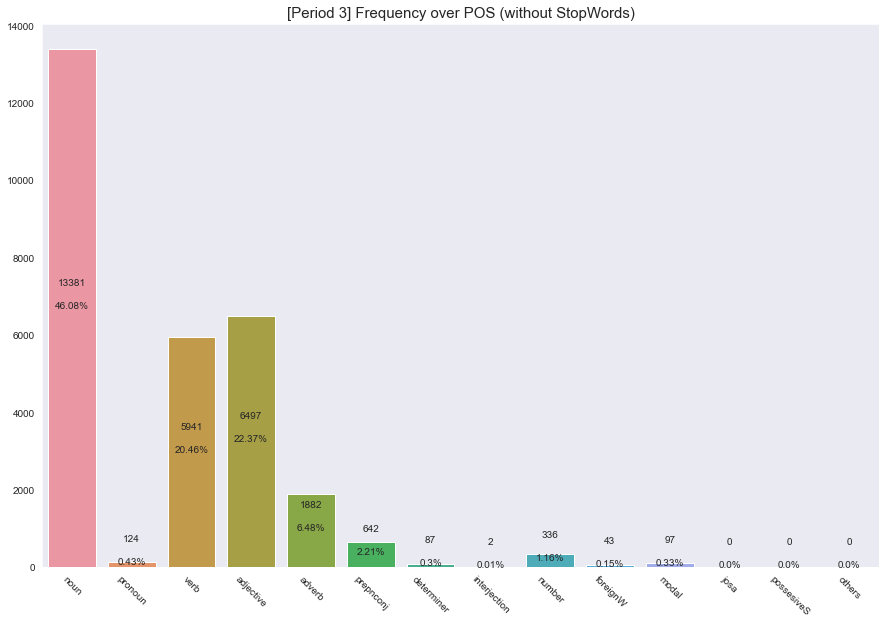

In [44]:
count, labels = CountNLabelOverPOS(wo_countDict_3)

plotTagFrequency(count, labels, "[Period 3] Frequency over POS (without StopWords)", RESULT_3, wo=True)

##### 분석 3) 'noun'인 token들의 Frequncy (상위 30개)

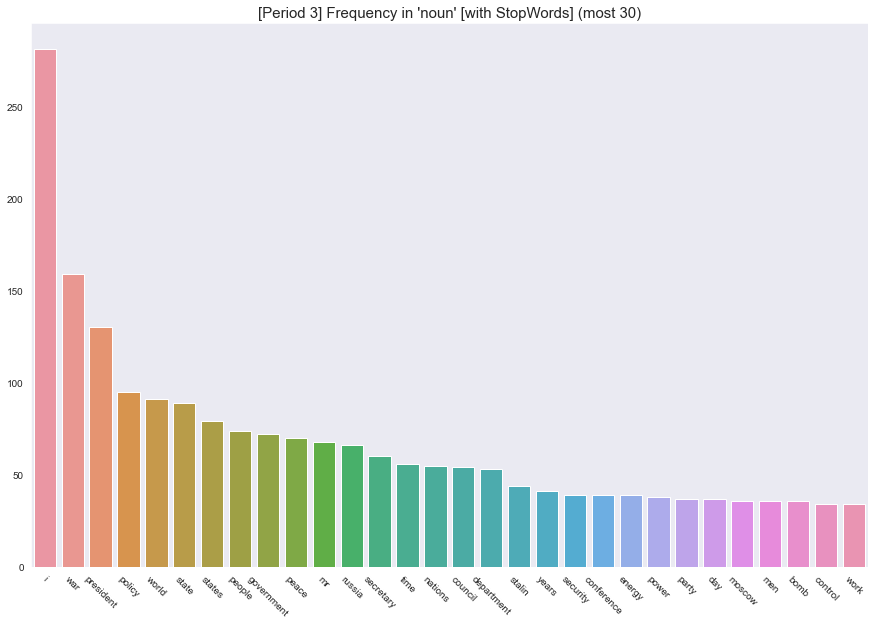

In [45]:
plotPOSFrequency(classDict_3, filepath=RESULT_3, pos='noun', wo=False, period=3)

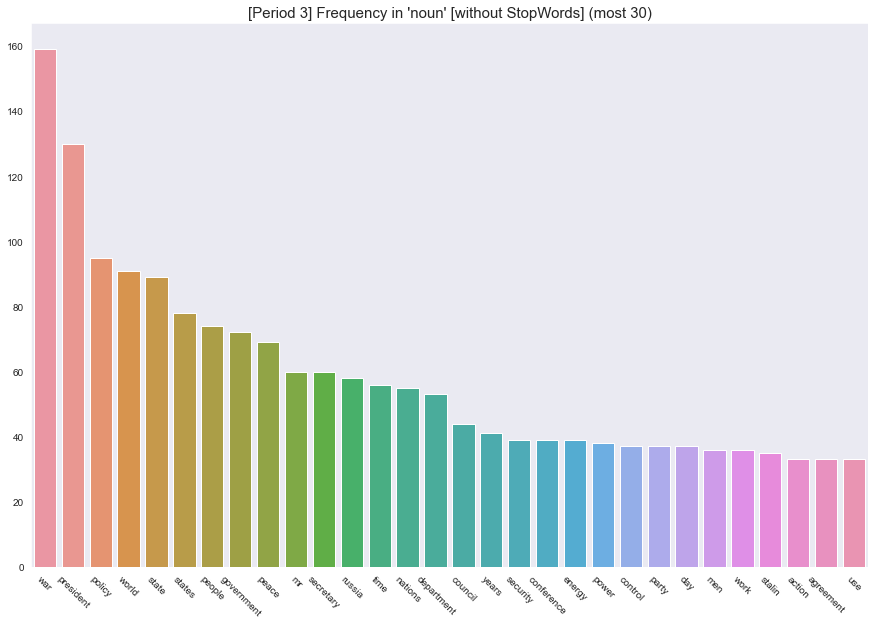

In [46]:
plotPOSFrequency(wo_classDict_3, filepath=RESULT_3, pos='noun', wo=True, period=3)

##### 분석 4) 'verb'인 token들의 Frequncy (상위 30개)

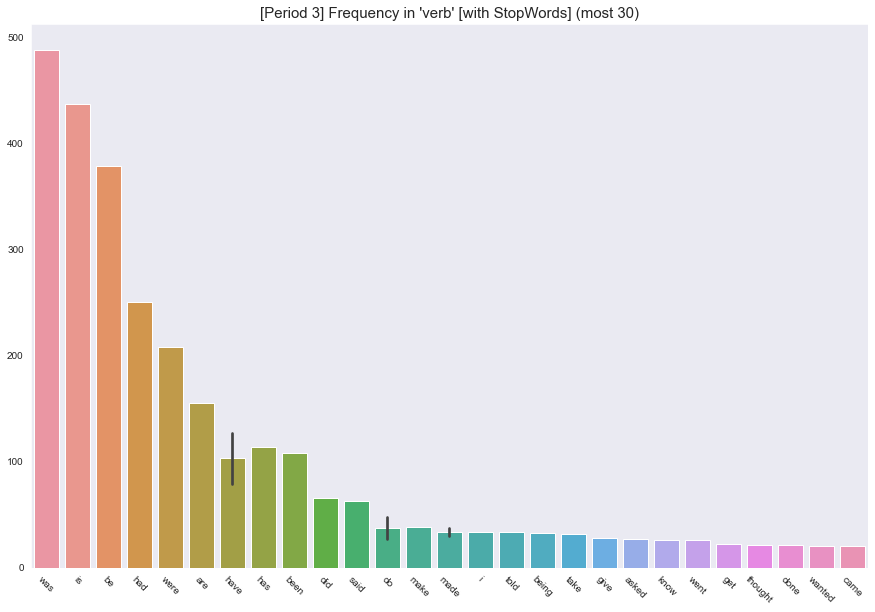

In [47]:
plotPOSFrequency(classDict_3, filepath=RESULT_3, pos='verb', wo=False, period=3)

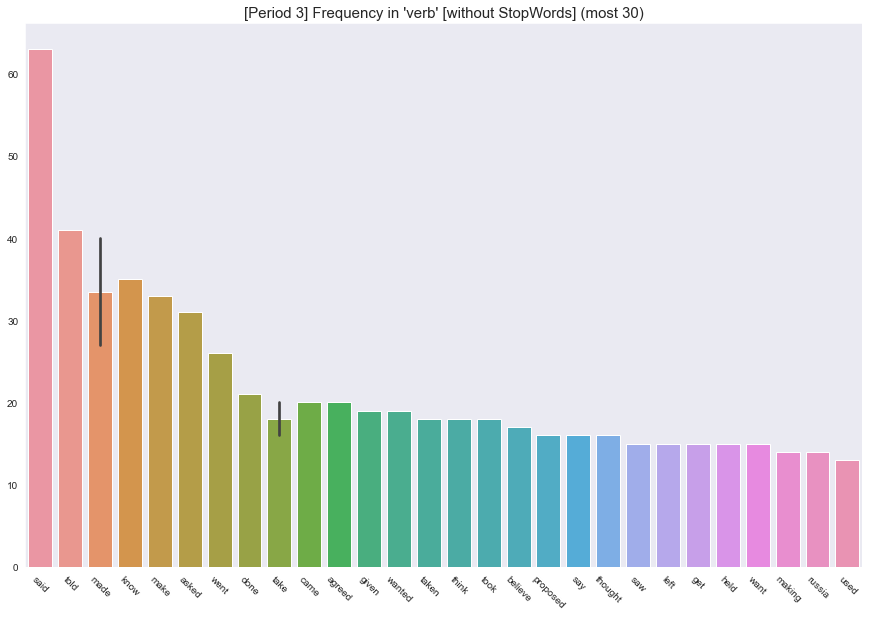

In [48]:
plotPOSFrequency(wo_classDict_3, filepath=RESULT_3, pos='verb', wo=True, period=3)

##### 분석 5) 'adjective'인 token들의 Frequncy (상위 30개)

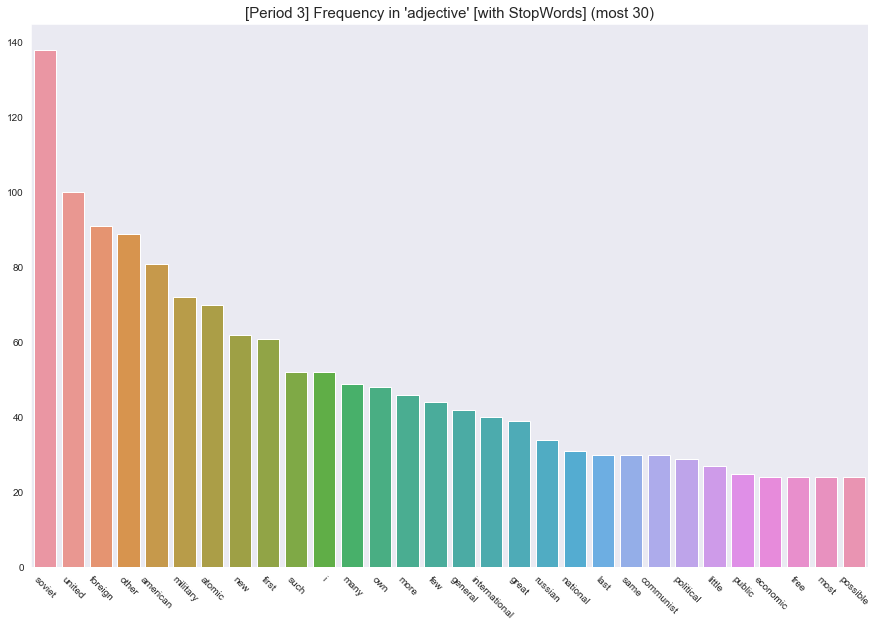

In [49]:
plotPOSFrequency(classDict_3, filepath=RESULT_3, pos='adjective', wo=False, period=3)

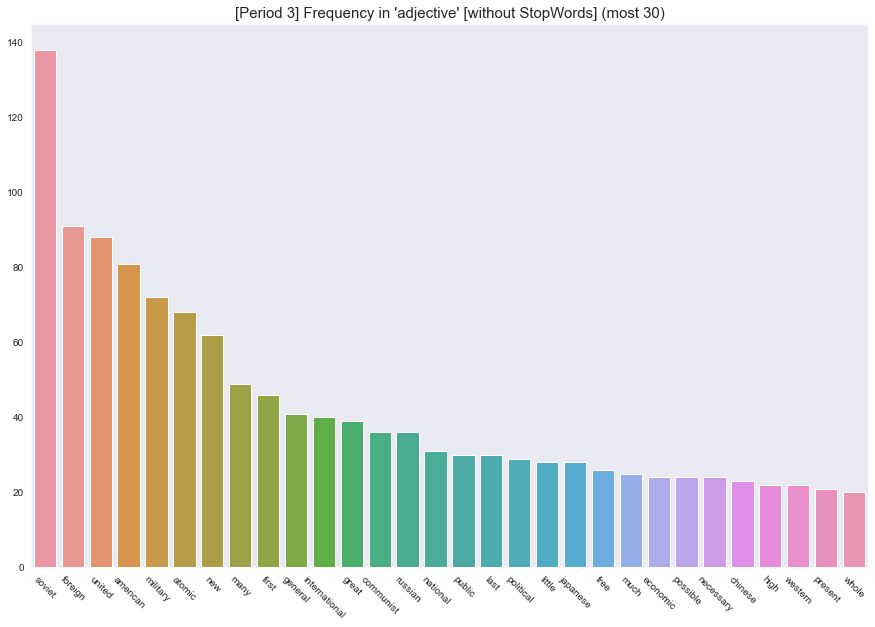

In [50]:
plotPOSFrequency(wo_classDict_3, filepath=RESULT_3, pos='adjective', wo=True, period=3)

### 4-2. WordCloud

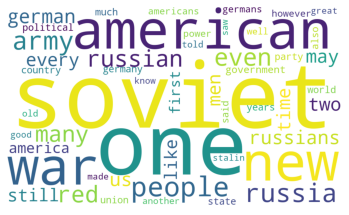

In [51]:
plotWordCloud(merge(wo_stopword_1), filepath=RESULT_1)

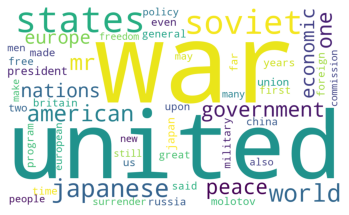

In [52]:
plotWordCloud(merge(wo_stopword_2), filepath=RESULT_2)

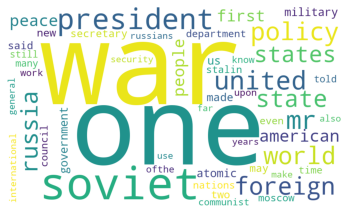

In [53]:
plotWordCloud(merge(wo_stopword_3), filepath=RESULT_3)

### 4-3. Topic Modeling

#### Define Hyperparameter

In [54]:
NUM_TOPICS = 10
NUM_TOPIC_WORDS = 30

#### Period 1

In [55]:
Corp, Dict = buildDTM(wo_stopword_1)
model = models.ldamodel.LdaModel(Corp, num_topics = NUM_TOPICS, id2word=Dict)
topicdf = topicWords(model, NUM_TOPIC_WORDS)
data = visualizeLDA(model, Corp, Dict)

data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.003984 -0.002597       1        1  39.469750
8     -0.002078 -0.004989       2        1  22.706825
2     -0.003475  0.001402       3        1  11.472456
4     -0.003954  0.000842       4        1   8.358764
9      0.003988  0.004159       5        1   8.304536
7     -0.004149 -0.000154       6        1   7.726184
3      0.006081 -0.001126       7        1   1.256119
5     -0.000757  0.002124       8        1   0.407811
0      0.000548 -0.000724       9        1   0.294338
1     -0.000189  0.001063      10        1   0.003216, topic_info=          Term        Freq       Total Category  logprob  loglift
3875    soviet  156.000000  156.000000  Default  30.0000  30.0000
1003       one  117.000000  117.000000  Default  29.0000  29.0000
50    american  103.000000  103.000000  Default  28.0000  28.0000
1626       war   90.000000   90.000000  Default  27.0000  27.0000
953        new   93.000000   93.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
1251   russian    0.001370   63.256618  Topic10  -6.6070  -0.3957
4249     union    0.001162   43.809378  Topic10  -6.7717  -0.1930
37        also    0.001106   41.438106  Topic10  -6.8210  -0.1867
881        may    0.001140   54.378012  Topic10  -6.7904  -0.4278
884        men    0.001132   51.185604  Topic10  -6.7971  -0.3740

[827 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
9671      1  0.517268    abattoir
4433      1  0.595601  aboutforty
4442      1  0.472879   abundance
4442      2  0.236440   abundance
1702      1  0.284755   according
...     ...       ...         ...
1684      5  0.070873       young
1684      6  0.141746       young
8436      1  0.551577    zaibatsu
8820      1  0.468512     zhdanov
8820      2  0.234256     zhdanov

[1565 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 3, 5, 10, 8, 4, 6, 1, 2])

#### Period 2

In [56]:
Corp, Dict = buildDTM(wo_stopword_2)
model = models.ldamodel.LdaModel(Corp, num_topics = NUM_TOPICS, id2word=Dict)
topicdf = topicWords(model, NUM_TOPIC_WORDS)
data = visualizeLDA(model, Corp, Dict)

data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.012465  0.002819       1        1  34.073376
6     -0.001948 -0.001769       2        1  21.062761
0     -0.009150  0.004415       3        1  12.995101
7     -0.012658 -0.001302       4        1  12.825961
4      0.005987  0.000699       5        1  11.798780
1      0.003976  0.003587       6        1   3.663185
5      0.006096 -0.006187       7        1   3.563615
2     -0.000370  0.001410       8        1   0.005741
3     -0.002484  0.003355       9        1   0.005740
9     -0.001914 -0.007026      10        1   0.005740, topic_info=          Term        Freq       Total Category  logprob  loglift
1320       war  129.000000  129.000000  Default  30.0000  30.0000
1277    united   95.000000   95.000000  Default  29.0000  29.0000
1126    states   85.000000   85.000000  Default  28.0000  28.0000
1111    soviet   84.000000   84.000000  Default  27.0000  27.0000
4772  japanese   56.000000   56.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
787         mr    0.001618   55.620962  Topic10  -6.4325  -0.6799
724       made    0.001289   30.860947  Topic10  -6.6596  -0.3179
498    foreign    0.001222   26.166116  Topic10  -6.7128  -0.2060
881      peace    0.001364   47.768785  Topic10  -6.6030  -0.6982
2057        us    0.001223   29.916722  Topic10  -6.7123  -0.3395

[803 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2111      1  0.497504    accepted
2111      2  0.124376    accepted
2111      3  0.124376    accepted
2111      4  0.124376    accepted
2111      5  0.124376    accepted
...     ...       ...         ...
1370      4  0.138006       years
1370      5  0.103505       years
1370      6  0.034502       years
1370      7  0.034502       years
3553      1  0.712217  zinovievno

[1426 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 7, 1, 8, 5, 2, 6, 3, 4, 10])

#### Period 3

In [57]:
Corp, Dict = buildDTM(wo_stopword_3)
model = models.ldamodel.LdaModel(Corp, num_topics = NUM_TOPICS, id2word=Dict)
topicdf = topicWords(model, NUM_TOPIC_WORDS)
data = visualizeLDA(model, Corp, Dict)

data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.000337 -0.000207       1        1  35.152241
2     -0.000790  0.002892       2        1  14.710080
6     -0.004996  0.000079       3        1   9.475987
9      0.002068  0.004403       4        1   8.928103
7      0.001770 -0.007266       5        1   8.446208
0      0.009678  0.002090       6        1   7.053705
3     -0.000379 -0.003547       7        1   5.886698
8     -0.001941 -0.000962       8        1   5.632945
1     -0.008794  0.002079       9        1   4.557114
5      0.003047  0.000440      10        1   0.156919, topic_info=           Term        Freq       Total Category  logprob  loglift
804   president   97.000000   97.000000  Default  30.0000  30.0000
1170        war  118.000000  118.000000  Default  29.0000  29.0000
725         one  111.000000  111.000000  Default  28.0000  28.0000
1707     soviet   96.000000   96.000000  Default  27.0000  27.0000
1145     united   71.000000   71.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
1157         us    0.075516   54.169728  Topic10  -6.4026  -0.1183
620        many    0.061542   35.635464  Topic10  -6.6073   0.0958
49     american    0.069298   65.424289  Topic10  -6.4886  -0.3930
2412       said    0.064400   48.904533  Topic10  -6.5619  -0.1753
688         new    0.063422   47.465469  Topic10  -6.5772  -0.1607

[818 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3760      1  0.458454  acheson
3760      2  0.137536  acheson
3760      3  0.045845  acheson
3760      4  0.091691  acheson
3760      5  0.091691  acheson
...     ...       ...      ...
1209      5  0.128557    years
1209      6  0.064278    years
1209      7  0.064278    years
1209      8  0.032139    years
1209      9  0.032139    years

[1938 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 7, 10, 8, 1, 4, 9, 2, 6])

### 4-4. Netword web analysis

In [58]:
# result = (list(apriori(tokenized_1, min_support=0.01)))